In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from collections import Counter

In [3]:
df1 = pd.read_csv('gender_submission1.csv')
test = pd.read_csv('test1.csv')
train = pd.read_csv('train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [6]:
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop]

/Users/seangelb/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [7]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [11]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33',
       'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2',
       'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31',
       'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94',
       'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106',
       'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18',
       'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82',
       'B96 B98', 'E10', 'E44', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [12]:
def fix_cabin(data):
    data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in data['Cabin'] ])
fix_cabin(train)
fix_cabin(test)

In [13]:
train["Cabin"].head()

0    X
1    C
2    X
3    C
4    X
Name: Cabin, dtype: object

In [14]:
def fill_missing_values(df):
    ''' This function imputes missing values with median for numeric columns 
        and most frequent value for categorical columns'''
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    for column in list(missing.index):
        if df[column].dtype == 'object':
            df[column].fillna(df[column].value_counts().index[0], inplace=True)
        elif df[column].dtype == 'int64' or 'float64' or 'int16' or 'float16':
            df[column].fillna(df[column].median(), inplace=True)


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [16]:
fill_missing_values(train)
fill_missing_values(test)

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


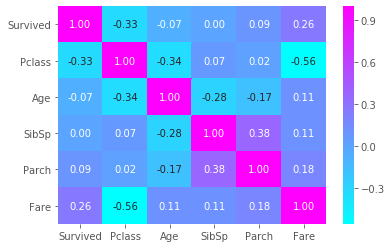

In [19]:
g = sns.heatmap(train.iloc[:, 1:].corr(),
                annot=True, 
                fmt = ".2f", 
                cmap = "cool")

In [20]:
train['Sex'].replace('female',0 ,inplace=True)
train['Sex'].replace('male', 1,inplace=True)

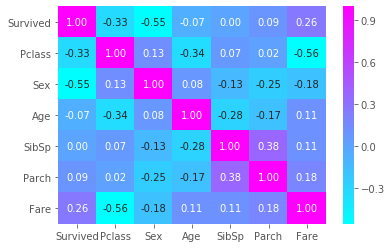

In [21]:
g = sns.heatmap(train.iloc[:, 1:].corr(),
                annot=True, 
                fmt = ".2f", 
                cmap = "cool")

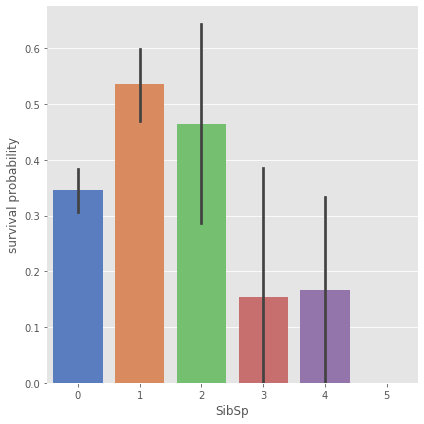

In [22]:
g = sns.catplot(x="SibSp",y="Survived",data=train,kind="bar", height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

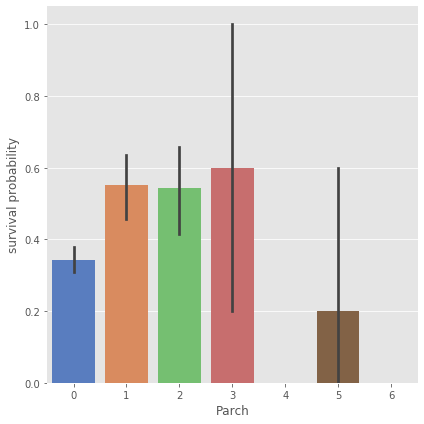

In [23]:
g  = sns.catplot(x="Parch", y="Survived", data=train,kind="bar", height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

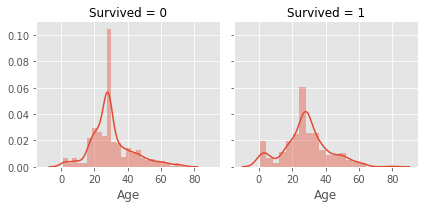

In [24]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

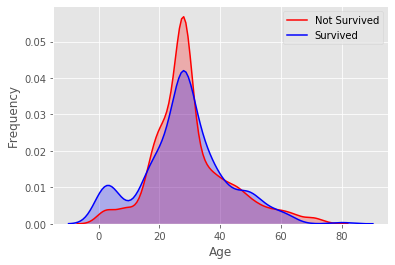

In [25]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

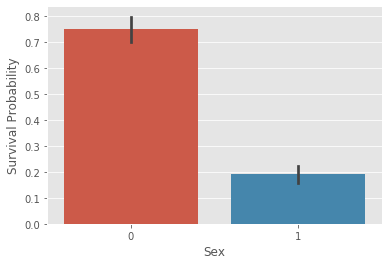

In [26]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")

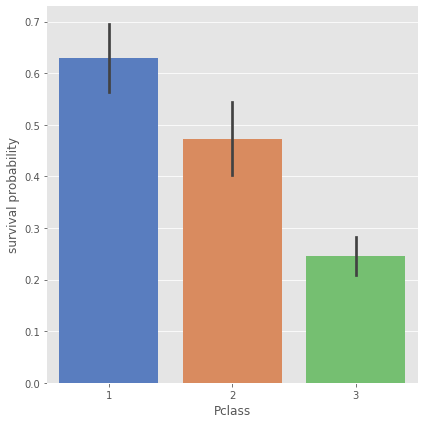

In [27]:
# Explore Pclass vs Survived
g = sns.catplot(x="Pclass",y="Survived",data=train,kind="bar", height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

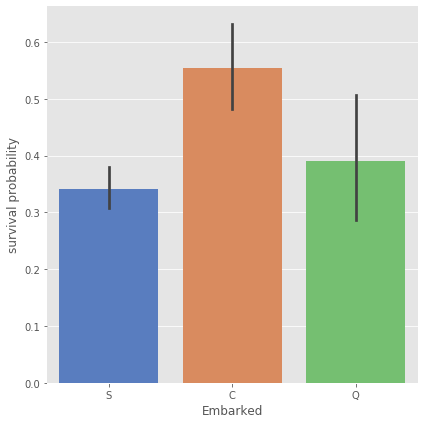

In [28]:
# Explore Embarked vs Survived 
g = sns.catplot(x="Embarked", y="Survived",  data=train,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

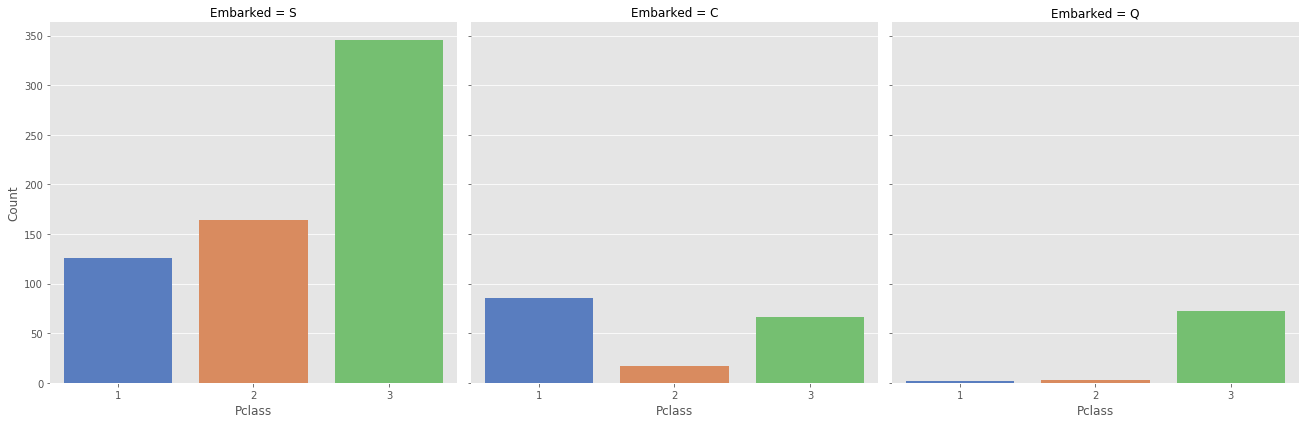

In [29]:
# Explore Pclass vs Embarked 
g = sns.catplot("Pclass", col="Embarked",  data=train,
                   height=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

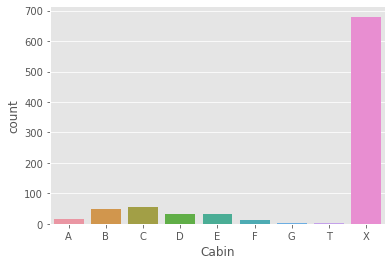

In [30]:
g = sns.countplot(train["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

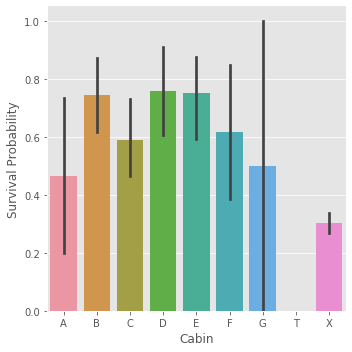

In [31]:
g = sns.catplot(y="Survived",x="Cabin",data=train,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,X,S


In [33]:
# Get Title from Name
def get_title(data):
    data_title = [i.split(",")[1].split(".")[0].strip() for i in data["Name"]]
    data["Title"] = pd.Series(data_title)
    data["Title"].head()
get_title(train)
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [34]:
get_title(test)
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

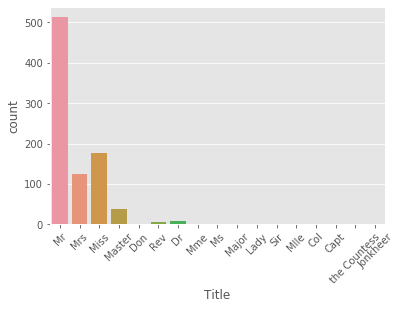

In [35]:
g = sns.countplot(x="Title",data=train)
g = plt.setp(g.get_xticklabels(), rotation=45)

In [36]:
# Convert to categorical values Title 
def convert_title(data):
    data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col',
                                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data["Title"] = data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
    data["Title"] = data["Title"].astype(int)
convert_title(train)
convert_title(test)

In [37]:
test['Title'].value_counts()

2    240
1    151
0     21
3      6
Name: Title, dtype: int64

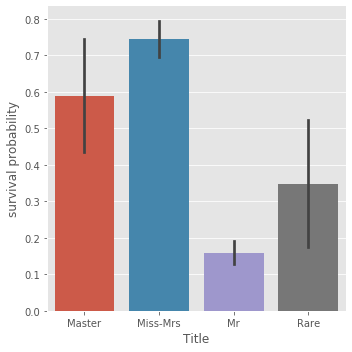

In [38]:
g = sns.catplot(x="Title",y="Survived",data=train,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [39]:
# Drop Name variable
train.drop(labels = ["Name"], axis = 1, inplace = True)
test.drop(labels=["Name"], axis=1, inplace=True)

In [40]:
# Create a family size descriptor from SibSp and Parch
train["Fsize"] = train["SibSp"] + train["Parch"] + 1
test["Fsize"] = test["SibSp"] + train["Parch"] + 1

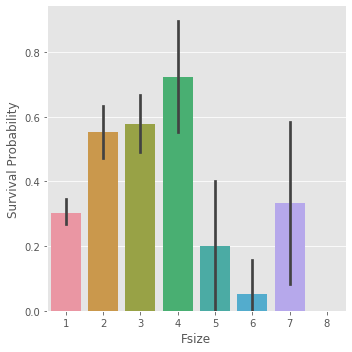

In [41]:
g = sns.catplot(x="Fsize",y="Survived",data=train, kind='bar')
g = g.set_ylabels("Survival Probability")

In [42]:
def create_fsize(data):
    data['Single'] = data['Fsize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallF'] = data['Fsize'].map(lambda s: 1 if  s == 2  else 0)
    data['MedF'] = data['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    data['LargeF'] = data['Fsize'].map(lambda s: 1 if s >= 5 else 0)
create_fsize(train)
create_fsize(test)

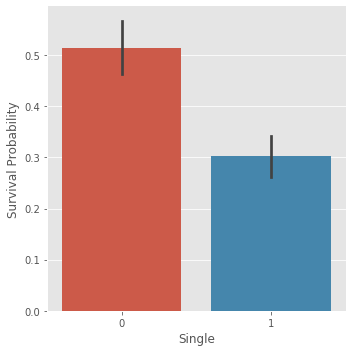

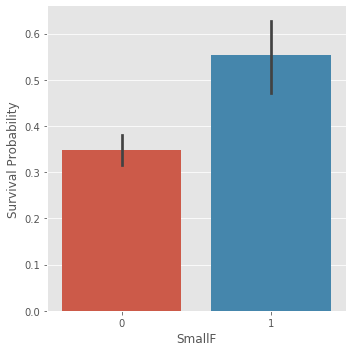

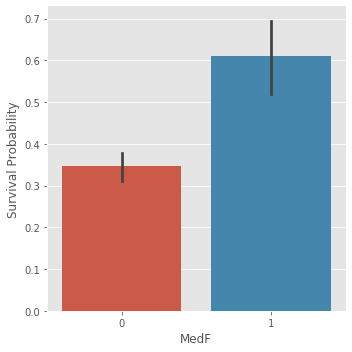

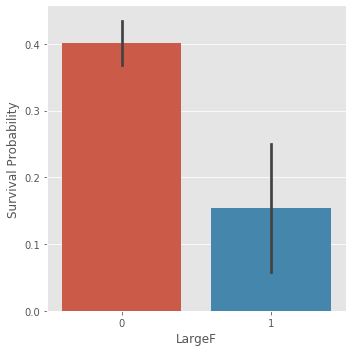

In [43]:
g = sns.catplot(x="Single",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="SmallF",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="MedF",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="LargeF",y="Survived",data=train,kind="bar")
g = g.set_ylabels("Survival Probability")

In [44]:
# convert to indicator values Title and Embarked 
def encode_train_embark(data):
    '''Encoding Categorical variable Embarked'''
    data = pd.get_dummies(data, columns = ["Title"])
    data = pd.get_dummies(data, columns = ["Embarked"], prefix="Em")
encode_train_embark(train)
encode_train_embark(test)

In [45]:
train['Cabin'] = train['Cabin'].map({'X': 1, 'C': 2, 'B': 3, 'D': 4, 'E': 5, 'A': 6, 'F': 7, 'G': 8, 'T': 9})
test['Cabin'] = test['Cabin'].map({'X': 1, 'C': 2, 'B': 3, 'D': 4, 'E': 5, 'A': 6, 'F': 7, 'G': 8, 'T': 9})

In [46]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Fsize          0
Single         0
SmallF         0
MedF           0
LargeF         0
dtype: int64

In [47]:
# Create categorical values for Pclass
train["Pclass"] = train["Pclass"].astype("category")
train = pd.get_dummies(train, columns = ["Pclass"],prefix="Pc")

test["Pclass"] = test["Pclass"].astype("category")
test = pd.get_dummies(test, columns = ["Pclass"],prefix="Pc")

In [48]:
# Drop useless variables 
train.drop(labels = ["PassengerId", "Ticket"], axis = 1, inplace=True)
test.drop(labels = ["PassengerId", "Ticket"], axis=1, inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
Survived    881 non-null int64
Sex         881 non-null int64
Age         881 non-null float64
SibSp       881 non-null int64
Parch       881 non-null int64
Fare        881 non-null float64
Cabin       881 non-null int64
Embarked    881 non-null object
Title       881 non-null int64
Fsize       881 non-null int64
Single      881 non-null int64
SmallF      881 non-null int64
MedF        881 non-null int64
LargeF      881 non-null int64
Pc_1        881 non-null uint8
Pc_2        881 non-null uint8
Pc_3        881 non-null uint8
dtypes: float64(2), int64(11), object(1), uint8(3)
memory usage: 99.0+ KB


In [50]:
from sklearn.preprocessing import LabelEncoder
def impute_cats(df):
    '''This function converts categorical and non-numeric 
       columns into numeric columns to feed into a ML algorithm'''
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers    
    label_enc = LabelEncoder()
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])

In [51]:
impute_cats(train)
impute_cats(test)

In [52]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF,Pc_1,Pc_2,Pc_3
0,0,1,22.0,1,0,7.2500,1,2,2,2,0,1,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,2,0,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,1,2,1,1,1,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,2,1,2,0,1,0,0,1,0,0
4,0,1,35.0,0,0,8.0500,1,2,2,1,1,0,0,0,0,0,1


In [53]:
# import the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Package for stacking models
from vecstack import stacking

/Users/seangelb/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/seangelb/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/si

In [54]:
y = train['Survived']
X = train.drop('Survived', axis=1)

In [55]:
def train_model(classifier, name="Classifier"):
    '''This function is used to train and print the accuracy of our models'''
    
    folds = StratifiedKFold(n_splits=20, random_state=42)
    accuracy = np.mean(cross_val_score(classifier, X, y, scoring="accuracy", cv=folds, n_jobs=-1))
    if name not in alg_list: alg_list.append(name)
    print(f"{name} Accuracy: {accuracy}")
    return accuracy

In [56]:
# Lists that keep track cross val means and algorithm names
cv_means = []
alg_list = []

In [57]:
# Initialize the model
log_reg = LogisticRegression(C=5, penalty='l2',random_state=42)
# Validate the model
log_reg_acc = train_model(log_reg, "Logistic Regression")
cv_means.append(log_reg_acc)
# Fit the best performing model to training data
log_reg.fit(X, y)


Logistic Regression Accuracy: 0.8229545454545455


/Users/seangelb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
svm = SVC(C=5, random_state=42)
# Validate the model
svm_acc = train_model(svm, "Support Vector Machine")
cv_means.append(svm_acc)
# Fit the best performing model to training data
svm.fit(X, y)

Support Vector Machine Accuracy: 0.7538131313131313


/Users/seangelb/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
# Initialize the model
#split it at least twice because age has such a high correlation 
rf = RandomForestClassifier(n_estimators=10, max_depth=25, 
                                min_samples_split=2, min_samples_leaf=2,
                                max_features="log2", random_state=12)
# Validate the model
rf_acc = train_model(rf, "Random Forest")
cv_means.append(rf_acc)
# Fit the best performing model to training data
rf.fit(X, y)


Random Forest Accuracy: 0.8218686868686869


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [60]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
# Validate the model
lda_acc = train_model(lda, "Linear Discriminant Analysis")
cv_means.append(lda_acc)
# Fit the best performing model to training data
lda.fit(X, y)

Linear Discriminant Analysis Accuracy: 0.8286616161616163


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [61]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 10), activation='relu', solver='adam', 
                    alpha=0.01, batch_size=32, learning_rate='constant', 
                    shuffle=False, random_state=42, early_stopping=True, 
                    validation_fraction=0.2, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
# Validate the model
mlp_acc = train_model(mlp, "MLP")
cv_means.append(mlp_acc)
# Fit the best performing model to training data
mlp.fit(X, y)

MLP Accuracy: 0.7970202020202021


MLPClassifier(activation='relu', alpha=0.01, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(50, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=False, solver='adam', tol=0.0001,
              validation_fraction=0.2, verbose=False, warm_start=False)

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 10), activation='relu', solver='adam', 
                    alpha=0.01, batch_size=32, learning_rate='constant', 
                    shuffle=False, random_state=42, early_stopping=True, 
                    validation_fraction=0.2, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
# Validate the model
mlp_acc = train_model(mlp, "MLP")
cv_means.append(mlp_acc)
# Fit the best performing model to training data
mlp.fit(X, y)

MLP Accuracy: 0.7970202020202021


MLPClassifier(activation='relu', alpha=0.01, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(50, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=False, solver='adam', tol=0.0001,
              validation_fraction=0.2, verbose=False, warm_start=False)

In [63]:
xgb = XGBClassifier(random_state=42)
# Validate the model
xgb_acc = train_model(xgb, "XgBoost")
cv_means.append(xgb_acc)
# Fit the best performing model to training data
xgb.fit(X, y)

XgBoost Accuracy: 0.8366414141414141


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
lgbm = LGBMClassifier(num_leaves=31, learning_rate=0.1, 
                      n_estimators=64, random_state=42, n_jobs=-1)
# Validate the model
lgbm_acc = train_model(lgbm, "LGBM")
cv_means.append(lgbm_acc)
# Fit the best performing model to training data
lgbm.fit(X, y)


LGBM Accuracy: 0.8366666666666667


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=64, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
from vecstack import stacking

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
models = [lda,rf,lgbm]

S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,
                           mode='oof_pred_bag',
                           n_folds=5,
                           save_dir=None,
                           needs_proba=False,
                           random_state=42,
                           stratified=True,
                           shuffle=True,
                           verbose=2
                          )


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearDiscriminantAnalysis]
    fold  0:  [0.80281690]
    fold  1:  [0.79432624]
    fold  2:  [0.80851064]
    fold  3:  [0.85714286]
    fold  4:  [0.81428571]
    ----
    MEAN:     [0.81541647] + [0.02187970]
    FULL:     [0.81534091]

model  1:     [RandomForestClassifier]
    fold  0:  [0.77464789]
    fold  1:  [0.78014184]
    fold  2:  [0.81560284]
    fold  3:  [0.82142857]
    fold  4:  [0.81428571]
    ----
    MEAN:     [0.80122137] + [0.01967908]
    FULL:     [0.80113636]

model  2:     [LGBMClassifier]
    fold  0:  [0.78873239]
    fold  1:  [0.81560284]
    fold  2:  [0.79432624]
    fold  3:  [0.84285714]
    fold  4:  [0.83571429]
    ----
    MEAN:     [0.81544658] + [0.02154929]
    FULL:     [0.81534091]



In [68]:
xgb.fit(S_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
stacked_pred = xgb.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, stacked_pred))

Final prediction score: [0.89265537]


In [70]:


y1_pred_L1 = models[0].predict(test)
y2_pred_L1 = models[1].predict(test)
y3_pred_L1 = models[2].predict(test)
S_test_L1 = np.c_[y1_pred_L1, y2_pred_L1, y3_pred_L1]



In [71]:


test_stacked_pred = xgb.predict(S_test_L1)
xgb.fit(X, y)
xgb_pred = xgb.predict(test)
rf_pred = rf.predict(test)
lda_pred = lda.predict(test)



In [72]:
old_test = pd.read_csv('test1.csv')

submission = pd.DataFrame({'PassengerId':old_test['PassengerId'], 'Survived': test_stacked_pred})
xgb_sub = pd.DataFrame({'PassengerId':old_test['PassengerId'], 'Survived': xgb_pred})
rf_sub = pd.DataFrame({'PassengerId':old_test['PassengerId'], 'Survived': rf_pred})
lda_sub = pd.DataFrame({'PassengerId':old_test['PassengerId'], 'Survived': lda_pred})

submission.to_csv("stacked_submission.csv", index=False)
xgb_sub.to_csv("xgboost_submission.csv", index=False)
rf_sub.to_csv("random_forest_submission.csv", index=False)
lda_sub.to_csv("lda_submission.csv", index=False)


In [74]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Fsize,Single,SmallF,MedF,LargeF,Pc_1,Pc_2,Pc_3
0,0,1,22.0,1,0,7.2500,1,2,2,2,0,1,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,2,0,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,1,2,1,1,1,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,2,1,2,0,1,0,0,1,0,0
4,0,1,35.0,0,0,8.0500,1,2,2,1,1,0,0,0,0,0,1


In [124]:
xAge = train['Age'].values

In [126]:
ySurvived = train['Survived'].values
np.corrcoef(xSex, ySurvived)

array([[ 1.        , -0.54601527],
       [-0.54601527,  1.        ]])

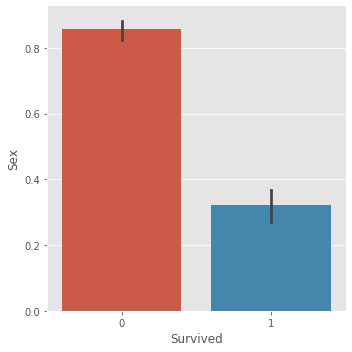

In [123]:
g = sns.catplot(x="Survived",y="Sex",data=train, kind='bar')